In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
# Phase 1: Data Preprocessing
# Data Import and Cleaning:
df = pd.read_csv('Food_Delivery_Time_Prediction.csv')
df.head()

,Order_ID,Customer_Location,Restaurant_Location,Distance,Weather_Conditions,Traffic_Conditions,Delivery_Person_Experience,Order_Priority,Order_Time,Vehicle_Type,Restaurant_Rating,Customer_Rating,Delivery_Time,Order_Cost,Tip_Amount
0,ORD0001,"(17.030479, 79.743077)","(12.358515, 85.100083)",1.57,Rainy,Medium,4,Medium,Afternoon,Car,4.1,3.0,26.22,1321.10,81.54
1,ORD0002,"(15.398319, 86.639122)","(14.174874, 77.025606)",21.32,Cloudy,Medium,8,Low,Night,Car,4.5,4.2,62.61,152.21,29.02
2,ORD0003,"(15.687342, 83.888808)","(19.594748, 82.048482)",6.95,Snowy,Medium,9,High,Night,Bike,3.3,3.4,48.43,1644.38,64.17
3,ORD0004,"(20.415599, 78.046984)","(16.915906, 78.278698)",13.79,Cloudy,Low,2,Medium,Evening,Bike,3.2,3.7,111.63,541.25,79.23
4,ORD0005,"(14.786904, 78.706532)","(15.206038, 86.203182)",6.72,Rainy,High,6,Low,Night,Bike,3.5,2.8,32.38,619.81,2.34


In [111]:
df.columns

Index(['Order_ID', 'Customer_Location', 'Restaurant_Location', 'Distance',
       'Weather_Conditions', 'Traffic_Conditions',
       'Delivery_Person_Experience', 'Order_Priority', 'Order_Time',
       'Vehicle_Type', 'Restaurant_Rating', 'Customer_Rating', 'Delivery_Time',
       'Order_Cost', 'Tip_Amount'],
      dtype='object')

In [113]:
df.isnull().sum().sum()

0

In [115]:
# Feature Engineering:
# Calculate the geographic distance between the customer and restaurant using latitude and longitude (Haversine formula).
import ast
df['Customer_Location'] = df['Customer_Location'].apply(ast.literal_eval)
df['Restaurant_Location'] = df['Restaurant_Location'].apply(ast.literal_eval)

def havershine_dist(a,b,c,d):
    a,b,c,d = map(np.radians,[a,b,c,d])
    dlat = a-c
    dlon = b-d
    x = np.sin(dlat/2)**2+ np.cos(a)*np.cos(c)*np.sin(dlon/2)**2
    y = 2*np.arcsin(np.sqrt(x))
    R = 6371
    return R*y

df['GeoDistance'] = df.apply(lambda row: havershine_dist(row['Customer_Location'][0], row['Customer_Location'][1], row['Restaurant_Location'][0], row['Restaurant_Location'][1]), axis =1)

In [117]:
df[['Customer_Location','Restaurant_Location','GeoDistance','Distance']]

,Customer_Location,Restaurant_Location,GeoDistance,Distance
0,"(17.030479, 79.743077)","(12.358515, 85.100083)",775.651198,1.57
1,"(15.398319, 86.639122)","(14.174874, 77.025606)",1042.385597,21.32
2,"(15.687342, 83.888808)","(19.594748, 82.048482)",476.220706,6.95
3,"(20.415599, 78.046984)","(16.915906, 78.278698)",389.912629,13.79
4,"(14.786904, 78.706532)","(15.206038, 86.203182)",806.505886,6.72
...,...,...,...,...
195,"(17.910045, 81.56199)","(18.098924, 87.896124)",670.130652,23.82
196,"(21.66459, 82.226635)","(16.892341, 80.554716)",558.891202,6.09
197,"(14.575401, 82.55641)","(13.625369, 82.418092)",106.686689,20.61
198,"(12.094497, 82.893369)","(19.135509, 86.659978)",880.580093,24.06


Delivery_Status
1    151
0     49
Name: count, dtype: int64


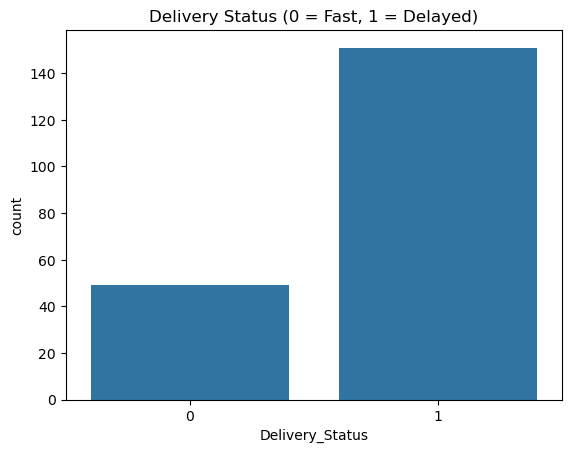

In [119]:
# Create binary categories based on delivery time (e.g., 1 for delayed and 0 for fast).

df['Delivery_Status'] = df['Delivery_Time'].apply(lambda x: 1 if x > 45 else 0)
print(df['Delivery_Status'].value_counts())

sns.countplot(x='Delivery_Status', data=df)
plt.title('Delivery Status (0 = Fast, 1 = Delayed)')
plt.show()


In [121]:
from sklearn.preprocessing import LabelEncoder

# List of columns to encode
cols_to_encode = ['Weather_Conditions', 'Traffic_Conditions', 
                  'Delivery_Person_Experience', 'Order_Priority', 
                  'Order_Time']

# Apply LabelEncoder to each column
le = LabelEncoder()
for col in cols_to_encode:
    df[col] = le.fit_transform(df[col])


In [123]:
# Phase 2: Classification using Naive Bayes, K-Nearest Neighbors, and Decision Tree
# Naive Bayes Classifier:

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
x=df[['Weather_Conditions', 'Traffic_Conditions', 'Order_Priority', 'Order_Time']]
y=df['Delivery_Status']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.5)
gnb = GaussianNB()
gnb.fit(x_train, y_train)
ynb_pred = gnb.predict(x_test)

print(f'The accuracy score is {accuracy_score(y_test,ynb_pred)}')
print(f'Classification Report as follows: \n{classification_report(y_test,ynb_pred)}')
print(f'Confusion Matrix : \n{confusion_matrix(y_test,ynb_pred)}')

The accuracy score is 0.73
Classification Report as follows: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.73      1.00      0.84        73

    accuracy                           0.73       100
   macro avg       0.36      0.50      0.42       100
weighted avg       0.53      0.73      0.62       100

Confusion Matrix : 
[[ 0 27]
 [ 0 73]]


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<Axes: >

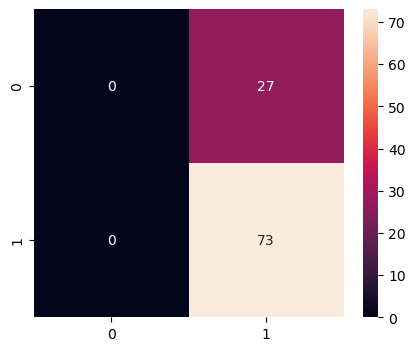

In [125]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test,ynb_pred),annot= True)


Accuracy with k=1: 64.00%
Classification Report for k=1:
              precision    recall  f1-score   support

           0       0.27      0.36      0.31        11
           1       0.80      0.72      0.76        39

    accuracy                           0.64        50
   macro avg       0.53      0.54      0.53        50
weighted avg       0.68      0.64      0.66        50


Accuracy with k=21: 74.00%
Classification Report for k=21:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        11
           1       0.77      0.95      0.85        39

    accuracy                           0.74        50
   macro avg       0.39      0.47      0.43        50
weighted avg       0.60      0.74      0.66        50



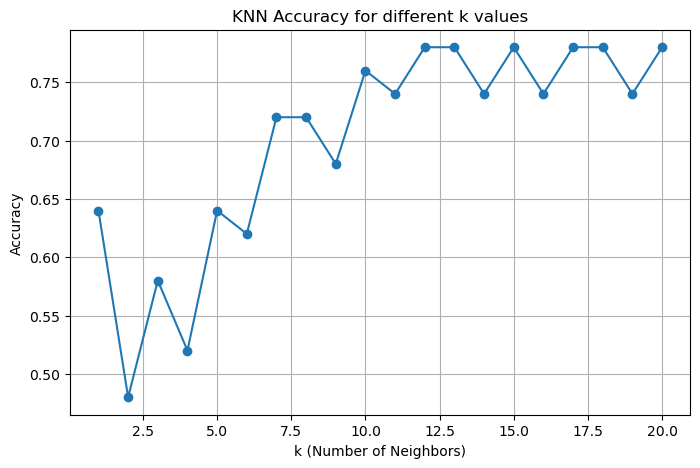

In [139]:
# K-Nearest Neighbors (KNN):
from sklearn.neighbors import KNeighborsClassifier
for k in [1, 21]:
    x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=0)
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    print(f'\nAccuracy with k={k}: {accuracy_score(y_test, y_pred) * 100:.2f}%')
    print(f'Classification Report for k={k}:\n{classification_report(y_test, y_pred)}')

# Optional: Accuracy vs k plot
k_range = range(1, 21)
accuracies = []

for k in k_range:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train, y_train)
    acc = accuracy_score(y_test, model.predict(x_test))
    accuracies.append(acc)

plt.figure(figsize=(8, 5))
plt.plot(k_range, accuracies, marker='o')
plt.title("KNN Accuracy for different k values")
plt.xlabel("k (Number of Neighbors)")
plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [141]:
# Decision Tree:

from sklearn.tree import DecisionTreeClassifier

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2)
x_train2, x_validation, y_train2, y_validation = train_test_split(x_train, y_train,test_size=0.2)
# for entropy
dtree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
dtree.fit(x_train2,y_train2)
prediction = dtree.predict(x_validation)
prediction2 = dtree.predict(x_test)

print(f"The Validation accuracy :{accuracy_score(y_validation, prediction)}")
print(f"The Test accuracy :{accuracy_score(y_test, prediction2)}")


The Validation accuracy :0.5625
The Test accuracy :0.8


In [143]:
# for gini
dtree2 = DecisionTreeClassifier(criterion='gini', max_depth=3)
dtree2.fit(x_train2,y_train2)
prediction = dtree2.predict(x_validation)
prediction2 = dtree2.predict(x_test)

print(f"The Validation accuracy :{accuracy_score(y_validation, prediction)}")
print(f"The Test accuracy :{accuracy_score(y_test, prediction2)}")


The Validation accuracy :0.5625
The Test accuracy :0.8


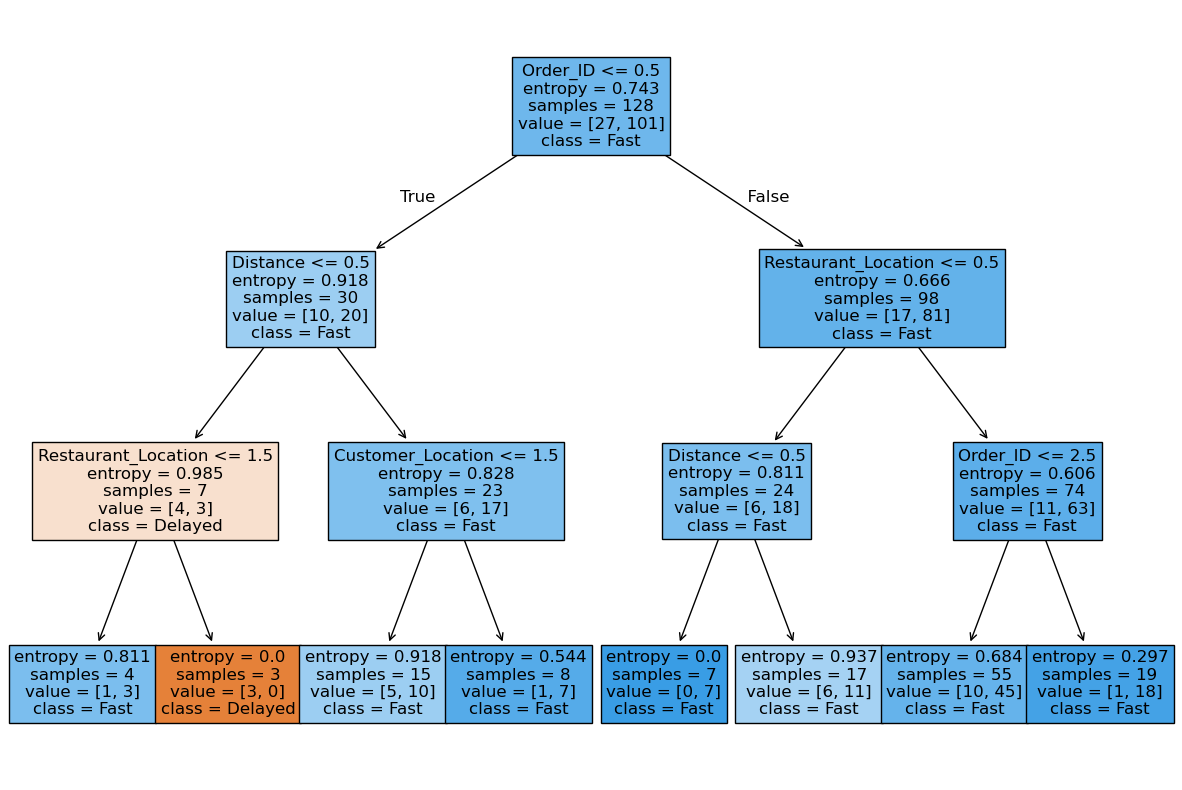

In [145]:
from sklearn.tree import plot_tree

plt.figure(figsize=(15,10))
a = plot_tree(dtree, feature_names=df.columns, fontsize=12, filled=True, class_names=['Delayed','Fast'])
plt.show()

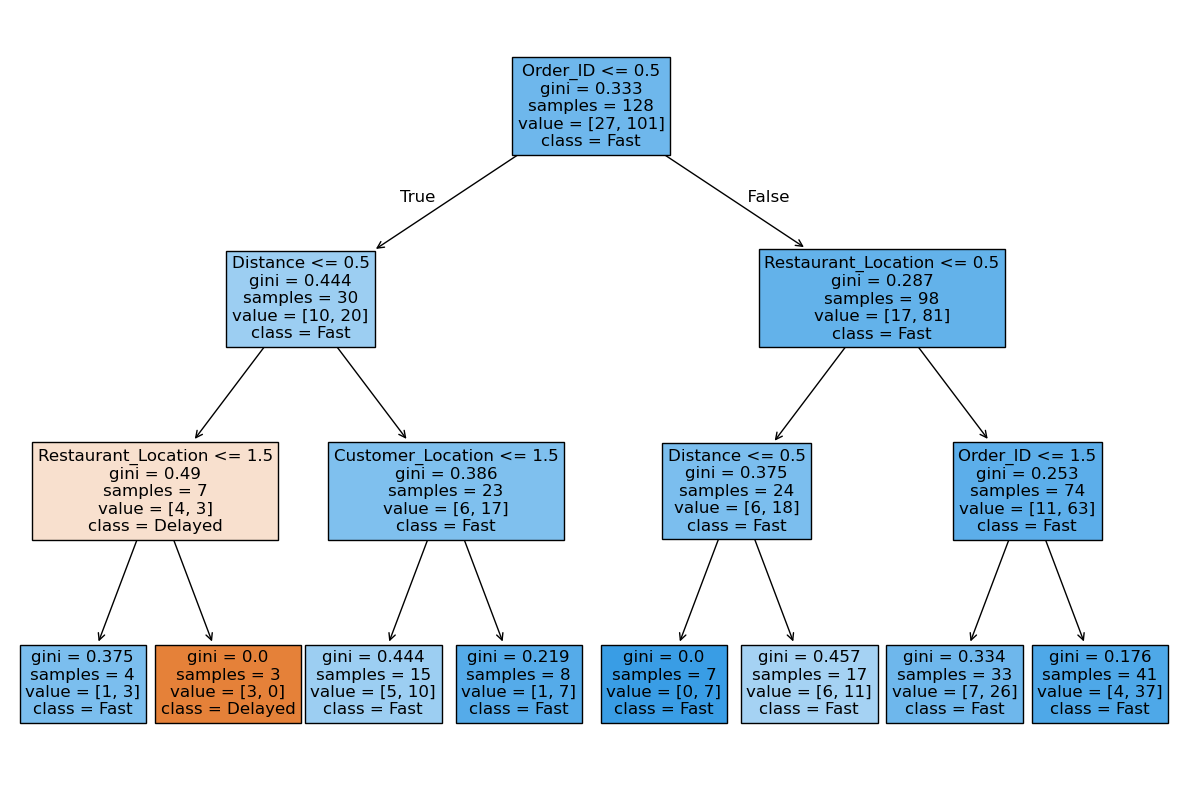

In [147]:
plt.figure(figsize=(15,10))
b = plot_tree(dtree2, feature_names=df.columns, fontsize=12, filled=True, class_names=['Delayed','Fast'])
plt.show()